# **Covid-19 Vaccine Data by County Analysis**

### Team Members


* Shruthi Palaniappan
* Ada Sadowski
* Avery Poster
* Arshia Mathur








<a id="toc"></a>
## Table of Contents
- [Data Cleanup (EDA)](#1)
- [Data Analysis](#2)
  -  [Patterns & Trends](#3)
  -  [Statistical Significance](#4)
- [Machine Learning Models](#5)
  -  [Decision Tree for Feature Selection](#6)
  -  [KNN Model](#7)
   

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats as scripystats
import statistics as stats

<a id="1"></a>
## 1. Data Cleanup




In [ ]:
# Load Data into Notebook
import io
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We had trouble accessing all the data using an API key and the csv file was taking a really long time to upload each time the notebook restarted, so we connected it to our google drives. To easily run the notebook first open this link https://drive.google.com/drive/folders/1xYukv8jYbHwvHU9kOCkhL6ZBW3Ucp-h7?usp=share_link to a shared drive with csv files in it. Then shortcut the folder to to your google drive. To do this click shared with you, find the folder, right click and click organize, click add shortcut and then add to my drive. After this run the first cell above to mount the google colab to your drive and then the csv files should easily read in. We aplogize for the inconvenience... this was the best way we could read in the data without having to wait a long time.

In [ ]:
# file paths
# Link to shared google drive
file_path1 = '/content/drive/My Drive/DS3000 Group Project/COVID-19_Vaccinations.csv'
file_path2 = '/content/drive/My Drive/DS3000 Group Project/Vaccine_Hesitancy.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read in vaccine data
vac_df = pd.read_csv(file_path1)
vac_df.head()

<ipython-input-5-b4a7f5ab0b15>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vac_df = pd.read_csv(file_path1)


,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/10/2023,55129,19,Washburn County,WI,96.7,11123.0,70.8,11097.0,73.9,...,12758.0,4304.0,3978.0,26.5,3955.0,28.6,3899.0,30.6,2588.0,60.1
1,05/10/2023,19173,19,Taylor County,IA,97.3,3149.0,51.4,3145.0,55.0,...,4687.0,1392.0,841.0,14.7,841.0,16.3,834.0,17.8,588.0,42.2
2,05/10/2023,36059,19,Nassau County,NY,97.5,1391226.0,95.0,1384503.0,95.0,...,1065968.0,246690.0,236202.0,18.4,231748.0,19.8,224931.0,21.1,109947.0,44.6
3,05/10/2023,48281,19,Lampasas County,TX,98.9,11678.0,54.5,11660.0,57.4,...,16799.0,4322.0,1951.0,9.6,1947.0,10.5,1925.0,11.5,1229.0,28.4
4,05/10/2023,26145,19,Saginaw County,MI,94.0,104075.0,54.6,NaN,NaN,...,149676.0,37414.0,15618.0,8.7,15448.0,9.4,15112.0,10.1,7921.0,21.2


In [ ]:
# shape of vaccine data
vac_df.shape

(1962781, 80)

The vaccine data has 80 columns and not all of them are necessary for our purposes. Based on the data dictionary these are the ones we are not using:

3. Completeness_pct
4. series_complete_pop_pct_ur_equity
5.
series_complete_5pluspop_pct_ur_equity
6.
series_complete_5to17pop_pct_ur_equity
7. series_complete_12pluspop_pct_ur_equity
8. series_complete_18pluspop_pct_ur_equity
9. series_complete_65pluspop_pct_ur_equity
10. booster_doses_vax_pct_svi
11. booster_doses_12plusvax_pct_svi
12. booster_doses_18plusvax_pct_svi
13. booster_doses_65plusvax_pct_svi 14. booster_doses_vax_pct_ur_equity
15. booster_doses_12plusvax_pct_ur_equity
16. booster_doses_18plusvax_pct_ur_equity
17. booster_doses_65plusvax_pct_ur_equity
18. svi_ctgy
19. series_complete_pop_pct_svi
20.  series_complete_5pluspop_pct_svi
21. series_complete_5to17pop_pct_svi
22. series_complete_12pluspop_pct_svi

23. series_complete_18pluspop_pct_svi
24. series_complete_65pluspop_pct_svi
25. metro_status





In [ ]:
# List of columns to be dropped
columns_to_drop = [
    'Completeness_pct',
    'Series_Complete_Pop_Pct_UR_Equity',
    'Series_Complete_5PlusPop_Pct_UR_Equity',
    'Series_Complete_5to17Pop_Pct_UR_Equity',
    'Series_Complete_12PlusPop_Pct_UR_Equity',
    'Series_Complete_18PlusPop_Pct_UR_Equity',
    'Series_Complete_65PlusPop_Pct_UR_Equity',
    'Booster_Doses_Vax_Pct_SVI',
    'Booster_Doses_12PlusVax_Pct_SVI',
    'Booster_Doses_18PlusVax_Pct_SVI',
    'Booster_Doses_65PlusVax_Pct_SVI',
    'Booster_Doses_Vax_Pct_UR_Equity',
    'Booster_Doses_12PlusVax_Pct_UR_Equity',
    'Booster_Doses_18PlusVax_Pct_UR_Equity',
    'Booster_Doses_65PlusVax_Pct_UR_Equity',
    'SVI_CTGY',
    'Series_Complete_Pop_Pct_SVI',
    'Series_Complete_5PlusPop_Pct_SVI',
    'Series_Complete_5to17Pop_Pct_SVI',
    'Series_Complete_12PlusPop_Pct_SVI',
    'Series_Complete_18PlusPop_Pct_SVI',
    'Series_Complete_65PlusPop_Pct_SVI',
    'Metro_status'
]

# Create a new DataFrame without the specified columns
# New df ensures old columns are still accesible
vac_df = vac_df.drop(columns=columns_to_drop)

vac_df.shape

(1962781, 57)

In [ ]:
# Count missing values in each column
missing_values = vac_df.isnull().sum()

# Filter columns with missing values
columns_with_mv = missing_values[missing_values > 0]

print(columns_with_mv)

Recip_State                                    81
Administered_Dose1_Recip                    58287
Administered_Dose1_Pop_Pct                  24085
Administered_Dose1_Recip_5Plus            1215611
Administered_Dose1_Recip_5PlusPop_Pct     1210831
Administered_Dose1_Recip_12Plus            117580
Administered_Dose1_Recip_12PlusPop_Pct      48598
Administered_Dose1_Recip_18Plus             99383
Administered_Dose1_Recip_18PlusPop_Pct      30202
Administered_Dose1_Recip_65Plus             99278
Administered_Dose1_Recip_65PlusPop_Pct      30097
Series_Complete_Yes                          6266
Series_Complete_Pop_Pct                     14887
Series_Complete_5Plus                     1186856
Series_Complete_5PlusPop_Pct              1195477
Series_Complete_5to17                     1531588
Series_Complete_5to17Pop_Pct              1539721
Series_Complete_12Plus                      24623
Series_Complete_12PlusPop_Pct               33244
Series_Complete_18Plus                       6266


In [ ]:
# count the frequency of missing values in each row
# (i.e. how many columns are empty)
vac_df.isnull().sum(axis=1).sort_values(ascending = False)

229967    52
896980    52
238104    52
28044     52
275062    52
          ..
55920      0
55922      0
55923      0
55924      0
0          0
Length: 1962781, dtype: int64

In [ ]:
# With 55 columns delete any row with  more than half missing
# delete any rows that have more than 20 values missing
vac_df = vac_df[vac_df.isnull().sum(axis=1) < 20]

# check shape of data frame
vac_df.shape

(658464, 57)

In [ ]:
# Check which columns still have missing values
# Count missing values in each column
missing_values = vac_df.isnull().sum()

# Filter columns with missing values
columns_with_mv = missing_values[missing_values > 0]

print(columns_with_mv)

Administered_Dose1_Recip                    3437
Administered_Dose1_Pop_Pct                  3437
Administered_Dose1_Recip_5Plus              6098
Administered_Dose1_Recip_5PlusPop_Pct       6098
Administered_Dose1_Recip_12Plus             6098
Administered_Dose1_Recip_12PlusPop_Pct      6098
Administered_Dose1_Recip_18Plus             6059
Administered_Dose1_Recip_18PlusPop_Pct      6059
Administered_Dose1_Recip_65Plus             6033
Administered_Dose1_Recip_65PlusPop_Pct      6033
Series_Complete_5to17                     243908
Series_Complete_5to17Pop_Pct              243908
Booster_Doses_5Plus                       514524
Booster_Doses_5Plus_Vax_Pct               514524
Booster_Doses_12Plus                       69428
Booster_Doses_12Plus_Vax_Pct               69428
Second_Booster_50Plus                     523854
Second_Booster_50Plus_Vax_Pct             523854
Second_Booster_65Plus                     523854
Second_Booster_65Plus_Vax_Pct             523854
Census2019_5to17Pop 

In [ ]:
# Since doses adminsitered is based on county it will be hard to imputate
# We will delete the rows where it is missing

vac_df = vac_df.dropna()

# Check shape
vac_df.shape

(78791, 57)

In [ ]:
#check how data is represented
vac_df.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
0,05/10/2023,55129,19,Washburn County,WI,11123.0,70.8,11097.0,73.9,10863.0,...,12758.0,4304.0,3978.0,26.5,3955.0,28.6,3899.0,30.6,2588.0,60.1
1,05/10/2023,19173,19,Taylor County,IA,3149.0,51.4,3145.0,55.0,3079.0,...,4687.0,1392.0,841.0,14.7,841.0,16.3,834.0,17.8,588.0,42.2
2,05/10/2023,36059,19,Nassau County,NY,1391226.0,95.0,1384503.0,95.0,1329779.0,...,1065968.0,246690.0,236202.0,18.4,231748.0,19.8,224931.0,21.1,109947.0,44.6
3,05/10/2023,48281,19,Lampasas County,TX,11678.0,54.5,11660.0,57.4,11468.0,...,16799.0,4322.0,1951.0,9.6,1947.0,10.5,1925.0,11.5,1229.0,28.4
5,05/10/2023,13101,19,Echols County,GA,1573.0,39.3,1572.0,41.4,1537.0,...,2963.0,553.0,92.0,2.4,88.0,2.7,86.0,2.9,59.0,10.7


In [ ]:
#change date to datetime type
vac_df['Date'] = pd.to_datetime(vac_df['Date'])

<ipython-input-14-9994c87bbf49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_df['Date'] = pd.to_datetime(vac_df['Date'])


In [ ]:
# Pull out alabama data to check FIPS code allignment
alabama = vac_df[vac_df['Recip_State'] == 'AL']
alabama.head()

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,...,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus,Bivalent_Booster_65Plus_Pop_Pct
130,2023-05-10,01015,19,Calhoun County,AL,67165.0,59.1,67079.0,62.7,66012.0,...,89132.0,20547.0,7679.0,7.2,7667.0,7.8,7596.0,8.5,4469.0,21.8
169,2023-05-10,01099,19,Monroe County,AL,11707.0,56.5,11696.0,59.4,11496.0,...,16360.0,4385.0,955.0,4.9,953.0,5.3,948.0,5.8,568.0,13.0
209,2023-05-10,01049,19,DeKalb County,AL,30901.0,43.2,30868.0,45.9,30415.0,...,54392.0,12601.0,3166.0,4.7,3162.0,5.2,3125.0,5.7,1947.0,15.5
249,2023-05-10,01003,19,Baldwin County,AL,149596.0,67.0,149203.0,70.6,146406.0,...,175680.0,46830.0,19133.0,9.1,18922.0,9.8,18490.0,10.5,11957.0,25.5
349,2023-05-10,01009,19,Blount County,AL,22914.0,39.6,22892.0,42.1,22591.0,...,44571.0,10814.0,2285.0,4.2,2283.0,4.6,2269.0,5.1,1402.0,13.0


In [ ]:
# read in hesitancy data
hesitancy_df = pd.read_csv(file_path2)
hesitancy_df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,1123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,1121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,1131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,1129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,1119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,...,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [ ]:
hesitancy_df.shape

(3142, 21)

In [ ]:
# We can merge on FIPS code
# however hesitancy_df has 4 digit codes when first digit is 0

# First change FIPS codes to be 5 digits
hesitancy_df['FIPS Code'] = hesitancy_df['FIPS Code'].apply(lambda x: '{:05d}'.format(x))
hesitancy_df.head()

,FIPS Code,County Name,State,Estimated hesitant,Estimated hesitant or unsure,Estimated strongly hesitant,Social Vulnerability Index (SVI),SVI Category,CVAC level of concern for vaccination rollout,CVAC Level Of Concern,...,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,State Code,County Boundary,State Boundary
0,01123,"Tallapoosa County, Alabama",ALABAMA,0.1806,0.2400,0.1383,0.89,Very High Vulnerability,0.64,High Concern,...,0.0242,0.0022,0.0036,0.2697,0.0000,0.6887,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-85.841259 33.104456, -85.8409...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
1,01121,"Talladega County, Alabama",ALABAMA,0.1783,0.2350,0.1368,0.87,Very High Vulnerability,0.84,Very High Concern,...,0.0229,0.0043,0.0061,0.3237,0.0003,0.6263,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-86.303069 33.46316, -86.30306...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
2,01131,"Wilcox County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.93,Very High Vulnerability,0.94,Very High Concern,...,0.0053,0.0009,0.0003,0.6938,0.0000,0.2684,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-87.52534299999999 32.132773, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
3,01129,"Washington County, Alabama",ALABAMA,0.1735,0.2357,0.1337,0.73,High Vulnerability,0.82,Very High Concern,...,0.0146,0.0731,0.0025,0.2354,0.0000,0.6495,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.45317899999999 31.505388, ...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."
4,01119,"Sumter County, Alabama",ALABAMA,0.1808,0.2526,0.1390,0.96,Very High Vulnerability,0.96,Very High Concern,...,0.0053,0.0007,0.0214,0.7192,0.0000,0.2481,POINT (-86.844516 32.756889),AL,"MULTIPOLYGON (((-88.369055 32.742584, -88.3685...","MULTIPOLYGON (((-88.139988 34.581703, -88.1352..."


In [ ]:
# Merge the two datasets to get one
merged_df = pd.merge(vac_df, hesitancy_df,
                     left_on = 'FIPS',
                     right_on = 'FIPS Code',
                     how = 'inner')
merged_df.shape

(76763, 78)

In [ ]:
# Drop the rows with null data to get the merged dataframe
merged_df = merged_df.dropna()

In [ ]:
merged_df.shape

(69845, 78)

In [ ]:
merged_df['FIPS'].value_counts()

FIPS
55129    26
37119    26
50011    26
05077    26
42111    26
         ..
26015     2
26003     2
26111     2
26119     2
26037     2
Name: count, Length: 2754, dtype: int64

In [ ]:
# Check which columns are uneccasary
#call all the column names
print("These are the column names:",merged_df.columns)

These are the column names: Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5

In [ ]:
# We can remove FIPS, Recip_County, Recip_State, State Code
# because those exist twice
# remove Percent adults fully vaccinated against COVID-19 (as of 6/10/21)

columns_to_drop = ['FIPS', 'Recip_County', 'Recip_State', 'State Code',
                   'Percent adults fully vaccinated against COVID-19 (as of 6/10/21)']

merged_df = merged_df.drop(columns = columns_to_drop)

In [ ]:
# Move some columns to the front
columns_to_move = ['FIPS Code', 'County Name', 'State']
remaining_columns = [col for col in merged_df.columns if col not in columns_to_move]
df = merged_df[columns_to_move + remaining_columns]

In [ ]:
# Make MMWR_week a category object
df['MMWR_week'] = df['MMWR_week'].astype('category')

In [ ]:
df.head(5)

,FIPS Code,County Name,State,Date,MMWR_week,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,...,CVAC Level Of Concern,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,County Boundary,State Boundary
0,55129,"Washburn County, Wisconsin",WISCONSIN,2023-05-10,19,11123.0,70.8,11097.0,73.9,10863.0,...,Very Low Concern,0.0184,0.0109,0.0064,0.0029,0.0029,0.9417,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-92.03270099999999 45.900253, ...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
1,55129,"Washburn County, Wisconsin",WISCONSIN,2023-05-03,18,11122.0,70.8,11096.0,73.9,10862.0,...,Very Low Concern,0.0184,0.0109,0.0064,0.0029,0.0029,0.9417,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-92.03270099999999 45.900253, ...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
2,55129,"Washburn County, Wisconsin",WISCONSIN,2023-04-26,17,11122.0,70.8,11096.0,73.9,10862.0,...,Very Low Concern,0.0184,0.0109,0.0064,0.0029,0.0029,0.9417,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-92.03270099999999 45.900253, ...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
3,55129,"Washburn County, Wisconsin",WISCONSIN,2023-04-19,16,11121.0,70.7,11095.0,73.9,10861.0,...,Very Low Concern,0.0184,0.0109,0.0064,0.0029,0.0029,0.9417,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-92.03270099999999 45.900253, ...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."
4,55129,"Washburn County, Wisconsin",WISCONSIN,2023-04-12,15,11121.0,70.7,11095.0,73.9,10861.0,...,Very Low Concern,0.0184,0.0109,0.0064,0.0029,0.0029,0.9417,POINT (-89.732969 44.639954),"MULTIPOLYGON (((-92.03270099999999 45.900253, ...","MULTIPOLYGON (((-92.887067 45.644148, -92.8825..."


<a id="2"></a>
## 2. Data Analysis



<a id="3"></a>
###  Patterns & Trends

In [ ]:
# Pull descriptive stats for each column
df.describe(include = 'all')

,FIPS Code,County Name,State,Date,MMWR_week,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,...,CVAC Level Of Concern,Percent Hispanic,Percent non-Hispanic American Indian/Alaska Native,Percent non-Hispanic Asian,Percent non-Hispanic Black,Percent non-Hispanic Native Hawaiian/Pacific Islander,Percent non-Hispanic White,Geographical Point,County Boundary,State Boundary
count,69845,69845,69845,69845,69845.0,6.984500e+04,69845.000000,6.984500e+04,69845.000000,6.984500e+04,...,69845,69845.000000,69845.000000,69845.000000,69845.000000,69845.000000,69845.000000,69845,69845,69845
unique,2754,2754,49,NaN,26.0,NaN,NaN,NaN,NaN,NaN,...,5,NaN,NaN,NaN,NaN,NaN,NaN,49,2749,49
top,55129,"Washburn County, Wisconsin",GEORGIA,NaN,47.0,NaN,NaN,NaN,NaN,NaN,...,Moderate Concern,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-83.426574 32.638481),"MULTIPOLYGON (((-90.320515 38.594152, -90.3205...","MULTIPOLYGON (((-85.38658099999999 33.901719, ..."
freq,26,26,4097,NaN,2754.0,NaN,NaN,NaN,NaN,NaN,...,15146,NaN,NaN,NaN,NaN,NaN,NaN,4097,52,4097
mean,NaN,NaN,NaN,2023-02-11 07:45:55.524375296,NaN,8.229616e+04,61.302622,8.166047e+04,64.548201,7.825913e+04,...,NaN,0.071843,0.019799,0.013757,0.096233,0.000738,0.776165,NaN,NaN,NaN
min,NaN,NaN,NaN,2022-11-16 00:00:00,NaN,1.100000e+02,14.700000,1.090000e+02,15.500000,1.090000e+02,...,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.044400,NaN,NaN,NaN
25%,NaN,NaN,NaN,2022-12-28 00:00:00,NaN,6.719000e+03,50.800000,6.704000e+03,53.800000,6.540000e+03,...,NaN,0.020900,0.001200,0.002900,0.006900,0.000000,0.662000,NaN,NaN,NaN
50%,NaN,NaN,NaN,2023-02-08 00:00:00,NaN,1.566500e+04,59.500000,1.562200e+04,62.900000,1.536000e+04,...,NaN,0.037400,0.002800,0.006300,0.022700,0.000100,0.846600,NaN,NaN,NaN
75%,NaN,NaN,NaN,2023-03-29 00:00:00,NaN,4.668300e+04,69.800000,4.647700e+04,73.800000,4.539700e+04,...,NaN,0.076100,0.007100,0.013100,0.110700,0.000600,0.926900,NaN,NaN,NaN
max,NaN,NaN,NaN,2023-05-10 00:00:00,NaN,8.444862e+06,95.000000,8.372986e+06,95.000000,7.982095e+06,...,NaN,0.842100,0.901900,0.396300,0.872300,0.034000,0.995900,NaN,NaN,NaN


Based on the descriptive statistics pulled above the dataset features we can see that the dataset has 2,754 unique counties with Washburn County, Wisconsin appearing 26 times. The top state is Georgia with 4097 out of 69845 rows dedicated to it. There are a total of 26 unique medical weeks associated with the data.

In [ ]:
df.columns

Index(['FIPS Code', 'County Name', 'State', 'Date', 'MMWR_week',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax_Pct', 'Booster_Doses_

In [ ]:
top_counties = df[['County Name', 'Estimated hesitant']].sort_values(by='Estimated hesitant', ascending=False).head(5)

top_counties.head()

,County Name,Estimated hesitant
28694,"Pondera County, Montana",0.267
3657,"Fergus County, Montana",0.267
17202,"Wheatland County, Montana",0.267
17203,"Wheatland County, Montana",0.267
3664,"Fergus County, Montana",0.267


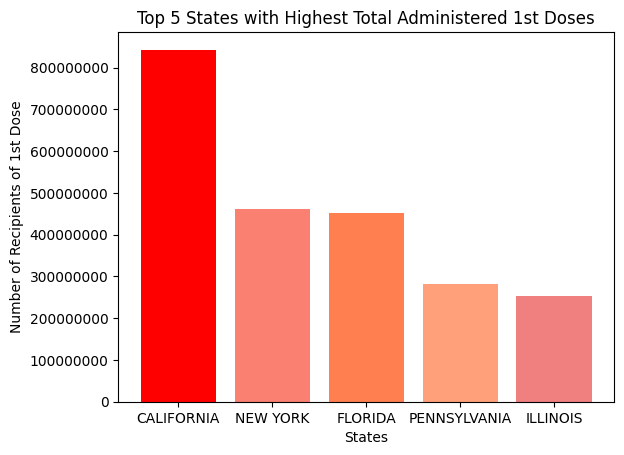

In [ ]:
# Plot the top 5 states with hightest number of recipients of 1st dose

states_dose1 = df.groupby('State') \
 ['Administered_Dose1_Recip'].sum().sort_values(ascending=False).head(5)

# Selecting the first 5 states
top_5_states = states_dose1.index

# Selecting the recipients countsex
top_5_recip = states_dose1.values

colors = ['red', 'salmon', 'coral', 'lightsalmon', 'lightcoral']

# Plotting the top 5 states
plt.bar(top_5_states, top_5_recip, color=colors)

# Adding labels and title
plt.xlabel('States')
plt.ylabel('Number of Recipients of 1st Dose')
plt.title('Top 5 States with Highest Total Administered 1st Doses')

plt.ticklabel_format(style='plain', axis='y')
# Showing the plot
plt.show()


The top 5 states with the largest amount of 1st dose recipients of the 1st does was California, New York, Florida, Pennsylvania, and Illinois. This makes sense however california is a large state so we should analyse the percentage of population rather than total number of recipients.

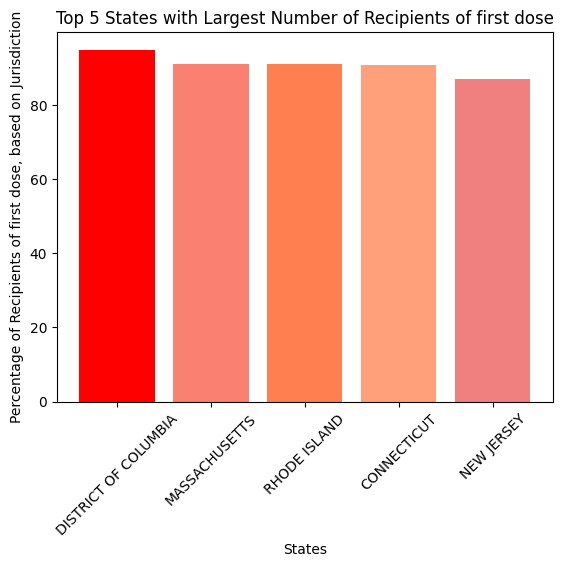

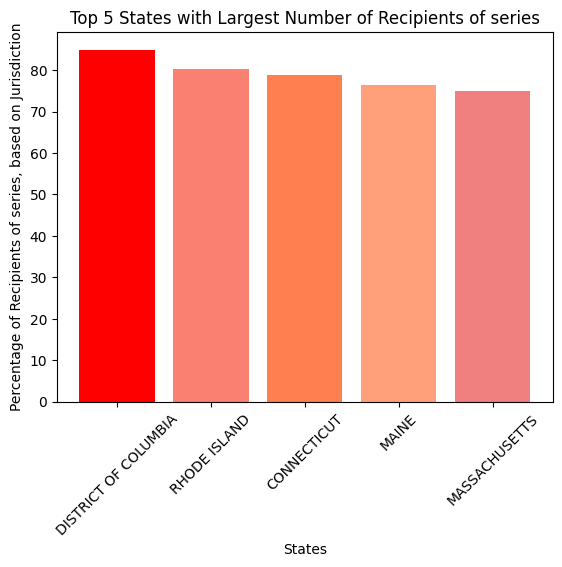

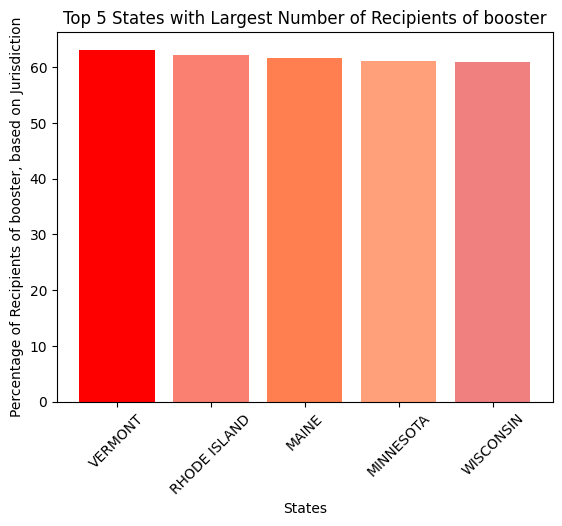

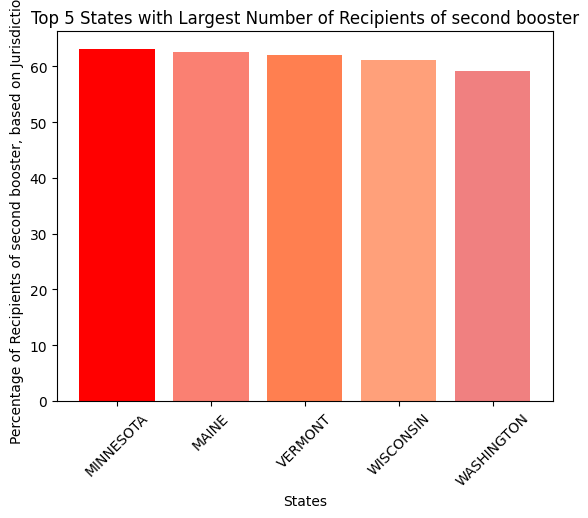

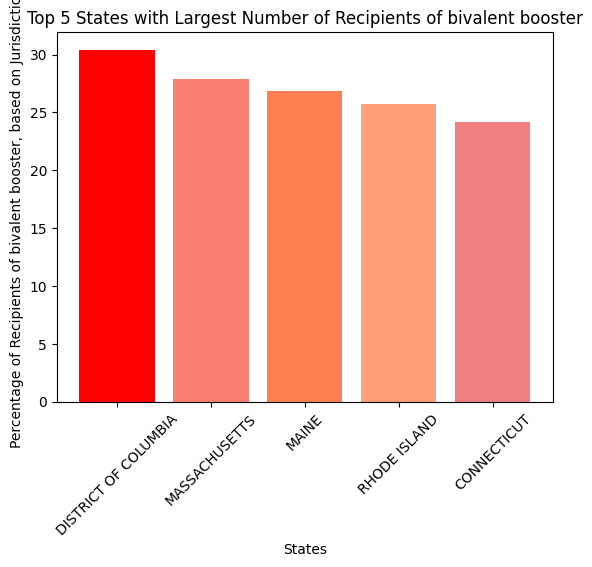

In [ ]:
# Plot the top 5 states with hightest number of recipients per population
# Of each dose
# Using a loop

dose_stats_list = ['Administered_Dose1_Pop_Pct', 'Series_Complete_Pop_Pct',
                   'Booster_Doses_Vax_Pct', 'Second_Booster_50Plus_Vax_Pct',
                   'Bivalent_Booster_5Plus_Pop_Pct']
dose_name_list = ['first dose', 'series', 'booster', 'second booster',
                  'bivalent booster']

# loop for plots
for stat, name in zip(dose_stats_list, dose_name_list):
  states_dose = df.groupby('State')\
  [stat].mean().sort_values(ascending=False).head(5)

  # Selecting the first 5 states
  top_5_states = states_dose.index

  # Selecting the recipients countsex
  top_5_recip = states_dose.values


  colors = ['red', 'salmon', 'coral', 'lightsalmon', 'lightcoral']

  # Plotting the top 5 states
  plt.bar(top_5_states, top_5_recip, color=colors)

  # Adding labels and title
  plt.xlabel('States')
  plt.xticks(rotation=45)
  plt.ylabel(f'Percentage of Recipients of {name}, based on Jurisdiction')
  plt.title(f'Top 5 States with Largest Number of Recipients of {name}')

  # Showing the plot
  plt.show()

The visualization confirms that percentage is more representative as California is no longer in the top 5. For the first dose DC had the largest percentage of population getting the vaccine and for most of the doses the top states are in the Northeast.

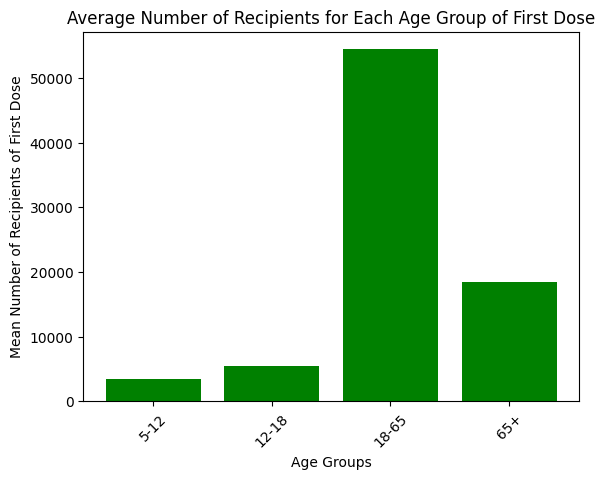

In [ ]:
# List of each age group column name for 1st dose
age_groups = ['5Plus', '12Plus', '18Plus', '65Plus']  # Age groups to consider
age_ranges = ['5-12', '12-18', '18-65', '65+']
recipients_columns = [f'Administered_Dose1_Recip_{age}' for age in age_groups]

# Average values of # of recipients for each age group
avg_dose1_rec = df[recipients_columns].mean()

# Make list of averages for each age range
range_rec = []
for i in range(len(avg_dose1_rec) - 1):
  range_rec.append(avg_dose1_rec.values[i] - avg_dose1_rec.values[i + 1])

range_rec.append(avg_dose1_rec.values[-1])

# Plot
plt.bar(age_ranges, range_rec, color='green')
plt.xlabel('Age Groups')
plt.ylabel('Mean Number of Recipients of First Dose')
plt.title('Average Number of Recipients for Each Age Group of First Dose')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.ticklabel_format(style='plain', axis='y')
# Showing the plot
plt.show()


The graph above is discusssing the average number of recipents for the first dose of the Covid-19 vaccine. Which unsuprisingly is the 18-65 age group as the biggest group. Not only does it have the biggest life span comparitvely but also this was first age group along with 65+ to be able to get the vaccine. The younger age groups took longer to study and make sure the vaccine was good for childern. Furthere confirms that the age group would have the largest number.

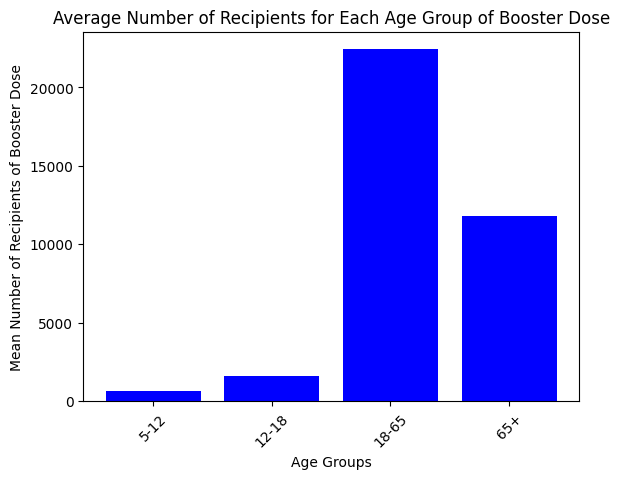

In [ ]:
# List of each age group column name for booster dose
age_groups = ['5Plus', '12Plus', '18Plus', '65Plus']  # Age groups to consider
age_ranges = ['5-12', '12-18', '18-65', '65+']
recipients_columns = [f'Booster_Doses_{age}' for age in age_groups]

# Average values of # of recipients for each age group
avg_dose1_rec = df[recipients_columns].mean()

# Make list of averages for each age range
range_rec = []
for i in range(len(avg_dose1_rec) - 1):
  range_rec.append(avg_dose1_rec.values[i] - avg_dose1_rec.values[i + 1])

range_rec.append(avg_dose1_rec.values[-1])

# Plot
plt.bar(age_ranges, range_rec, color='blue')
plt.xlabel('Age Groups')
plt.ylabel('Mean Number of Recipients of Booster Dose')
plt.title('Average Number of Recipients for Each Age Group of Booster Dose')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.ticklabel_format(style='plain', axis='y')
# Showing the plot
plt.show()

Based on the above visualization, it is clear which age range had the most administered first doses. From this visualization we can tell that 18-65 years old typically recived the first dose where as 5-12 year olds and 12-18 year olds were much less likely to recieve the first dose of the vaccination. The same goes for the Booster dose. However in comparison less people got the booster.

<a id="4"></a>
###  Statistical Significance

In [ ]:
# Correlation of Percentage of First Adminstered Doses and SVI
dose1_rate = df['Administered_Dose1_Pop_Pct']
svi = df['Social Vulnerability Index (SVI)']

# Calculate the correlation coefficient between the two variables
corr = dose1_rate.corr(svi)

print("Correlation Coefficient between Percentage of Adminstered 1st Doses\
 and Social Vulnerability Index:", round(corr,2))

Correlation Coefficient between Percentage of Adminstered 1st Doses and Social Vulnerability Index: -0.11


The correlation between percentage of Adminstered 1st doses and SVI is -0.1 which is a very weak negative correlation.

In [ ]:
# Correlation between completed series and demographics
vaccination_rate = df['Series_Complete_Pop_Pct']
demos = ['Percent non-Hispanic White',
                         'Percent non-Hispanic Black',
                         'Percent Hispanic',
                         'Percent non-Hispanic Asian',
                         'Percent non-Hispanic American Indian/Alaska Native',
                         'Percent non-Hispanic Native Hawaiian/Pacific Islander']

# Calculate the correlation coefficients between completed series
# and each demographic variable
corrs = {}

for var in demos:
    corr = vaccination_rate.corr(df[var])
    corrs[var] = corr

print("Correlation Coefficients between completed series\
 and Demographic Factors:")
for var, corr in corrs.items():
    print(f"{var}: {round(corr,2)}")

Correlation Coefficients between completed series and Demographic Factors:
Percent non-Hispanic White: -0.23
Percent non-Hispanic Black: -0.04
Percent Hispanic: 0.24
Percent non-Hispanic Asian: 0.41
Percent non-Hispanic American Indian/Alaska Native: 0.16
Percent non-Hispanic Native Hawaiian/Pacific Islander: 0.08


While most of the correlations between the percentage of a county with completed series and demographics is not stastically significant it is interesting that percent of non-Hispanic Asian and completed series pecent is positively correlated and 0.41.

One insight that may inform later analysis is the connection between SVI and percentage of vaccination. Below is a function which takes two SVI categories and determines if the number of completed series is significantly different using a t-test.

In [ ]:
alpha = 0.05

def sviSeriesTTest(svicat1, svicat2):
    s1 = df[df['SVI Category'] == svicat1]['Series_Complete_Pop_Pct']
    s2 = df[df['SVI Category'] == svicat2]['Series_Complete_Pop_Pct']
    _, p_value = scripystats.ttest_ind(s1, s2)
    print(f'The price difference between {svicat1} and {svicat2} groups is{" not " if p_value >= alpha else " "}statistically significant.')

sviSeriesTTest('Low Vulnerability', 'Moderate Vulnerability')
sviSeriesTTest('Moderate Vulnerability', 'Very High Vulnerability')
sviSeriesTTest('High Vulnerability', 'Very High Vulnerability')

The price difference between Low Vulnerability and Moderate Vulnerability groups is statistically significant.
The price difference between Moderate Vulnerability and Very High Vulnerability groups is statistically significant.
The price difference between High Vulnerability and Very High Vulnerability groups is statistically significant.


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = df[["MMWR_week"]]
y = df["Administered_Dose1_Recip"]


# Creating a linear regression model
linreg = LinearRegression()

# Fitting the model to the data
linreg.fit(X, y)

# Printing the coefficients
print("Intercept:", round(linreg.intercept_,2))
print("Coefficient:", round(linreg.coef_[0],2))


Intercept: 82567.13
Coefficient: -13.18


<a id="5"></a>
## 3. Machine Learning Models

<a id="6"></a>
### 1. Decision Tree for Feature Selection

In [ ]:
# making the cvac into a numerical level based off of its nominal values
cvac_numerical_concern = []
for concern in df['CVAC Level Of Concern']:
  if concern == 'Very Low Concern':
      cvac_numerical_concern.append(1)
  elif concern == 'Low Concern':
    cvac_numerical_concern.append(2)
  elif concern == 'Moderate Concern':
    cvac_numerical_concern.append(3)
  elif concern == 'High Concern':
    cvac_numerical_concern.append(4)
  elif concern == 'Very High Concern':
    cvac_numerical_concern.append(5)
  else:
    cvac_numerical_concern.append(0)
df["CVAC Numerical Concern"] = cvac_numerical_concern

In [ ]:
df.select_dtypes(include=['object']).columns

Index(['FIPS Code', 'County Name', 'State', 'SVI Category',
       'CVAC Level Of Concern', 'Geographical Point', 'County Boundary',
       'State Boundary'],
      dtype='object')

In [ ]:
df.columns

Index(['FIPS Code', 'County Name', 'State', 'Date', 'MMWR_week',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax_Pct', 'Booster_Doses_

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 1st Model for feature selection

# Have X be all the features
# Drop string columns that aren't categories like county and state
# Drop other hesitant columns
droped_columns = ['County Name', 'State', 'Date','Percent Hispanic',
       'Percent non-Hispanic American Indian/Alaska Native',
       'Percent non-Hispanic Asian', 'Percent non-Hispanic Black',
       'Percent non-Hispanic Native Hawaiian/Pacific Islander',
       'Percent non-Hispanic White', 'Geographical Point', 'County Boundary',
       'State Boundary','CVAC Level Of Concern', 'SVI Category',
       'Estimated hesitant', 'Estimated strongly hesitant']
X   = df.drop(['Estimated hesitant or unsure'] + droped_columns, axis=1)
y   = df['Estimated hesitant or unsure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=7)

# fitting and making the model
dtr = DecisionTreeRegressor(random_state=7)
dtr.fit(X_train, y_train)

#predict the labels for the test set
y_pred   = dtr.predict(X_test)
results = pd.DataFrame({'Actual Estimated Hesitant or Unsure': y_test,
                        'Predicted Estimated Hesitant or Unsure': y_pred})
print(results)

       Actual Estimated Hesitant or Unsure  \
12575                               0.2654   
74646                               0.2180   
32660                               0.1330   
28135                               0.2647   
59550                               0.2068   
...                                    ...   
14948                               0.1295   
35573                               0.2083   
48924                               0.2204   
66368                               0.1658   
16875                               0.0828   

       Predicted Estimated Hesitant or Unsure  
12575                                  0.2654  
74646                                  0.2180  
32660                                  0.1330  
28135                                  0.2647  
59550                                  0.2068  
...                                       ...  
14948                                  0.1295  
35573                                  0.2083  
48924          

In [ ]:
#Evaluate the model based on MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print(f'The mse of the model is: {(round(mse,2))}')

The mse of the model is: 0.0


The mse of 0.0 seems highly unlikely which suggest that one or more features could be inadvertantly the same as the label. We will test for feature importance and see if we can understand how the models mse was 0.

In [ ]:
# Model Tuning - Grid Search.
parameter_grid = {'max_depth': range(1,11),
          'random_state': [7]}
grid_dtr = GridSearchCV(dtr, parameter_grid, cv=5, return_train_score = True)
grid_dtr.fit(X, y)
print("Best parameters found: ", grid_dtr.best_params_)
print("Best score found: ", round(grid_dtr.best_score_,2))

Best parameters found:  {'max_depth': 10, 'random_state': 7}
Best score found:  0.71


FIPS Code                                        0.466588
Bivalent_Booster_5Plus_Pop_Pct                   0.228099
Booster_Doses_5Plus_Vax_Pct                      0.052106
Bivalent_Booster_5Plus                           0.034761
Series_Complete_5to17Pop_Pct                     0.033895
CVAC level of concern for vaccination rollout    0.033523
Booster_Doses_12Plus_Vax_Pct                     0.025131
Social Vulnerability Index (SVI)                 0.022866
Series_Complete_18PlusPop_Pct                    0.010498
Booster_Doses_65Plus_Vax_Pct                     0.007485
dtype: float64


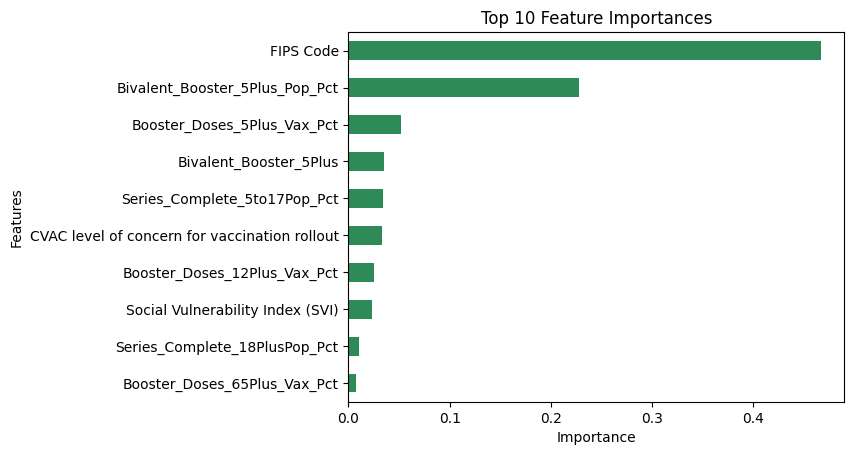

In [ ]:
# Get feature importances
feature_importances = dtr.feature_importances_
features = pd.Series(feature_importances, index=X_train.columns)


# Sort feature importances in descending order
features = features.sort_values(ascending= False)


# Plot the feature importances
top_features = features.head(10)
print(top_features)
top_features.sort_values().plot(kind='barh', color='seagreen')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

The graph above is representation of the features importance. This is only the top 10 features. This model was designed to find what were the best predicators which would then be used in the following two models as to better train them.

<a id="7"></a>
### 2. KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

top_features = ['FIPS Code', 'Bivalent_Booster_5Plus_Pop_Pct',
                'Booster_Doses_5Plus_Vax_Pct', 'Series_Complete_5to17Pop_Pct',
                'CVAC level of concern for vaccination rollout',
                'Booster_Doses_12Plus_Vax_Pct',
                'Social Vulnerability Index (SVI)',
                'Series_Complete_18PlusPop_Pct',
                'Booster_Doses_65Plus_Vax_Pct']

X = df[top_features]
y = df['Estimated hesitant or unsure']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=7)



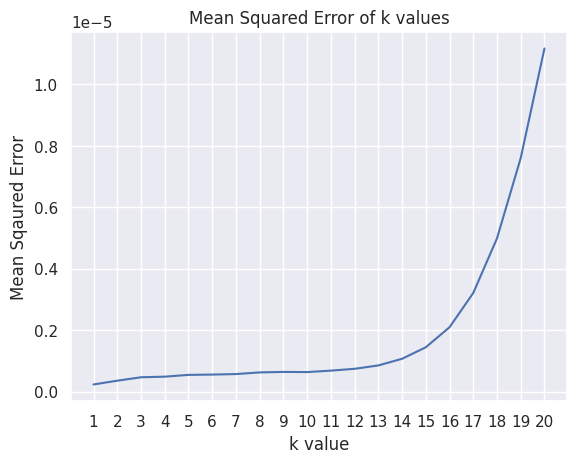

In [ ]:
#build the k-nn model, experiment with different values of k and plot the results
#Evaluate based on Mean Sqaured Error
import seaborn as sns
sns.set()
predictions = {}

for k in range(1,21):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    predictions[k] = mean_squared_error(y_test, y_pred)


#plot the accuracy for each value of k
sns.lineplot(x = predictions.keys(), y = predictions.values())
plt.title('Mean Squared Error of k values')
plt.xlabel('k value')
plt.xticks(range(1,21))

plt.ylabel('Mean Sqaured Error')

plt.show()

The graph demonstrates that MSE is lowest when k is the lowest, so we will therefore use k=1 for the model.

In [ ]:
# Use GridSearchCV to tune hyperparameters.
params = {'n_neighbors': range(1, 11),
          'weights': ['uniform', 'distance']}

knn = KNeighborsRegressor()

knn_grid = GridSearchCV(estimator = knn,
                        param_grid = params, cv=5, return_train_score = True)
knn_grid.fit(X_train, y_train)

print(knn_grid.best_params_) #print the best parameters
print(round(knn_grid.best_score_,2))

{'n_neighbors': 8, 'weights': 'distance'}
1.0


This is interesting because the test ran above that got the mse for different values of n_neighbors said that k=1 had the lowest mse but when using gridsearch it says 8.

In [ ]:
cv_results = pd.DataFrame(knn_grid.cv_results_)
cv_results = cv_results.sort_values('mean_test_score', ascending=False)
cv_results.head()
cv_results[['mean_train_score', 'std_train_score',
            'mean_test_score', 'std_test_score']].head()

,mean_train_score,std_train_score,mean_test_score,std_test_score
15,1.0,0.0,0.999933,0.000038
13,1.0,0.0,0.999931,0.000040
17,1.0,0.0,0.999930,0.000038
19,1.0,0.0,0.999924,0.000039
11,1.0,0.0,0.999922,0.000046


The mean_train_score and mean_test_score are both high and similar this suggests the model generalizes well to unseen data and the standard deviations for both are low.

In [ ]:
#tune knn model
# Initialize KNN regressor with best hyperparameters
knn_final = KNeighborsRegressor(n_neighbors=8, weights='distance')

# Fit the model to the entire training dataset
knn_final.fit(X_train, y_train)

#Evaluate the model based on MSE
y_pred = knn_final.predict(X_test)
mse =  mean_squared_error(y_test, y_pred)

print(f"mse of model is: {round(mse, 2)}")


mse of model is: 0.0


Since I rounded it seems like the MSE of the model is 0.0 however it is actually 1.6807516380838388e-07 which is a very low mse.

Overall this model did well with a low mean square error of 1.68*10^-7. Also this model determined the best k value as seen with the graph above. Through this model it was able to relatively well be able to predict the number of people who would be hesistant towards recieving a shot for each county.

##**3. Random Forest Regressor**

In [ ]:
# Using the features selected above
X = df[top_features]
y = df['Estimated hesitant or unsure']
print(X, y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=7)

      FIPS Code  Bivalent_Booster_5Plus_Pop_Pct  Booster_Doses_5Plus_Vax_Pct  \
0         55129                            26.5                         65.9   
1         55129                            26.4                         66.0   
2         55129                            26.3                         66.0   
3         55129                            26.2                         65.9   
4         55129                            26.3                         65.9   
...         ...                             ...                          ...   
76758     26083                            12.1                         62.4   
76759     26033                             9.1                         49.8   
76760     26033                             8.3                         49.7   
76761     26037                             8.8                         64.6   
76762     26037                             8.1                         64.6   

       Series_Complete_5to17Pop_Pct  \


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Build our random forest model
rf = RandomForestRegressor(random_state=7, n_estimators=50)
rf.fit(X_train, y_train)

# Assess our model's accuracy
y_pred = rf.predict(X_test)
print(f"The MSE of our model is {mean_squared_error(y_test, y_pred)}")

The MSE of our model is 3.304098410613728e-06


Just like with the knn estimator above, we have an incredibly low MSE of 3.30e-6. We need to evaluate our features to ensure that our model is accurate.

In [ ]:
# Use GridSearchCV to tune hyperparameters.
params = {'n_estimators': range(25, 101, 25),
          'random_state': [7]}

rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator = rf, param_grid = params, cv=5, return_train_score = True)
rf_grid.fit(X_train, y_train)

print(rf_grid.best_params_) #print the best parameters
print(round(rf_grid.best_score_,2))

{'n_estimators': 100, 'random_state': 7}
1.0


Overall this model did well but not as well as model two. As the mean squared error was slightly bigger than that of model two. So this model while not as accurate could also help predict relatively well the number of hesistant people by county.